In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing the data

In [2]:
offers = pd.read_csv("data_offers.csv")
offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [3]:
orders = pd.read_csv("data_orders.csv")
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


### Data merging and exploration

In [4]:
df = pd.merge(left = orders,right = offers,on='order_gk')
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275


In [5]:
df.shape

(31268, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31268 entries, 0 to 31267
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 31268 non-null  object 
 1   origin_longitude               31268 non-null  float64
 2   origin_latitude                31268 non-null  float64
 3   m_order_eta                    8364 non-null   float64
 4   order_gk                       31268 non-null  int64  
 5   order_status_key               31268 non-null  int64  
 6   is_driver_assigned_key         31268 non-null  int64  
 7   cancellations_time_in_seconds  21795 non-null  float64
 8   offer_id                       31268 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 2.4+ MB


## Tasks for the Project

### 1.	Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

In [7]:
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275


Text(0.5, 1.0, 'Distribution PLot for Reason of Order Rejection')

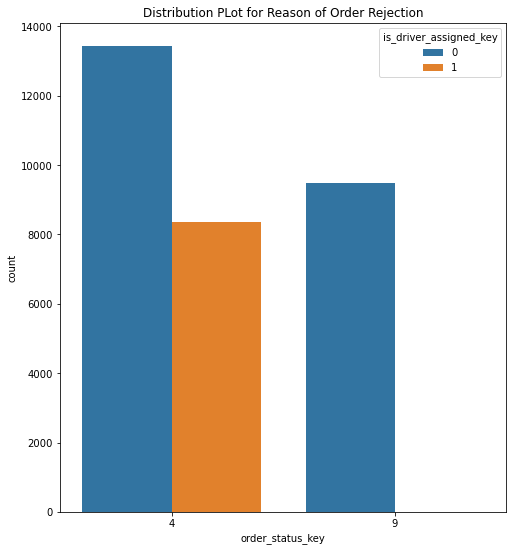

In [8]:
plt.figure(figsize=(8,9))
sns.countplot(x="order_status_key", hue = "is_driver_assigned_key", data=df)
plt.title("Distribution PLot for Reason of Order Rejection")

Less orders have been cancelled by the systems compared to the client. Orders cancelled by the system does not have drivers assigned. More orders cancelled by the client have no driver assigned to them.

### 2.	Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

#### The solution to this question is to segement the hours into early morning, morning, afternoon, late afternoon, evening, and late night

In [11]:
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31268 entries, 0 to 31267
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 31268 non-null  object 
 1   origin_longitude               31268 non-null  float64
 2   origin_latitude                31268 non-null  float64
 3   m_order_eta                    8364 non-null   float64
 4   order_gk                       31268 non-null  int64  
 5   order_status_key               31268 non-null  int64  
 6   is_driver_assigned_key         31268 non-null  int64  
 7   cancellations_time_in_seconds  21795 non-null  float64
 8   offer_id                       31268 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 2.4+ MB


In [15]:
# Changing the order datetime column to a datetime product
df['order_datetime']= pd.to_datetime(df["order_datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31268 entries, 0 to 31267
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_datetime                 31268 non-null  datetime64[ns]
 1   origin_longitude               31268 non-null  float64       
 2   origin_latitude                31268 non-null  float64       
 3   m_order_eta                    8364 non-null   float64       
 4   order_gk                       31268 non-null  int64         
 5   order_status_key               31268 non-null  int64         
 6   is_driver_assigned_key         31268 non-null  int64         
 7   cancellations_time_in_seconds  21795 non-null  float64       
 8   offer_id                       31268 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 2.4 MB


In [16]:
df['order_datetime'].head(20)

0    2023-06-16 18:08:07
1    2023-06-16 20:57:32
2    2023-06-16 20:57:32
3    2023-06-16 20:57:32
4    2023-06-16 12:07:50
5    2023-06-16 12:07:50
6    2023-06-16 12:07:50
7    2023-06-16 12:07:50
8    2023-06-16 12:07:50
9    2023-06-16 12:07:50
10   2023-06-16 13:50:20
11   2023-06-16 13:50:20
12   2023-06-16 13:50:20
13   2023-06-16 21:21:23
14   2023-06-16 21:21:23
15   2023-06-16 21:21:23
16   2023-06-16 21:21:23
17   2023-06-16 21:21:23
18   2023-06-16 21:21:23
19   2023-06-16 21:21:23
Name: order_datetime, dtype: datetime64[ns]

In [28]:
# Stripping the hour part of the order datetime column
df["Hour_of_Day"] = df['order_datetime'].dt.hour
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,Hour_of_Day
0,2023-06-16 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403,18
1,2023-06-16 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179,20
2,2023-06-16 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174,20
3,2023-06-16 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180,20
4,2023-06-16 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275,12


In [29]:
# 24 unique hours
df["Hour_of_Day"].unique()

array([18, 20, 12, 13, 21,  7,  8,  6, 15,  0, 22,  1,  3, 16, 14, 17, 19,
        9, 23, 11,  2,  4, 10,  5], dtype=int64)

In [30]:
df["Hour_of_Day"].dtype

dtype('int64')

In [32]:
# A function that segements the hour column in different parts of the day
def part_of_day(x):
  if (x>4) and (x<=8):
   return "Early Morning"
  elif (x>8) and (x<=12):
   return "Morning"
  elif (x>12) and (x<=16):
    return "Afternonn"
  elif (x>16) and (x<=19):
    return "Evening"
  elif (x>19) and (x<=22):
    return "Night"
  elif (x<=4):
    return "Late Night"


In [33]:
# Passing the function
df['part_of_day'] = df["Hour_of_Day"].apply(part_of_day)
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,Hour_of_Day,part_of_day
0,2023-06-16 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403,18,Evening
1,2023-06-16 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179,20,Night
2,2023-06-16 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174,20,Night
3,2023-06-16 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180,20,Night
4,2023-06-16 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275,12,Morning


In [36]:
df["part_of_day"].unique()

array(['Evening', 'Night', 'Morning', 'Afternonn', 'Early Morning',
       'Late Night', None], dtype=object)

Text(0.5, 1.0, 'Distribution of failed Orders by Hour of the Day')

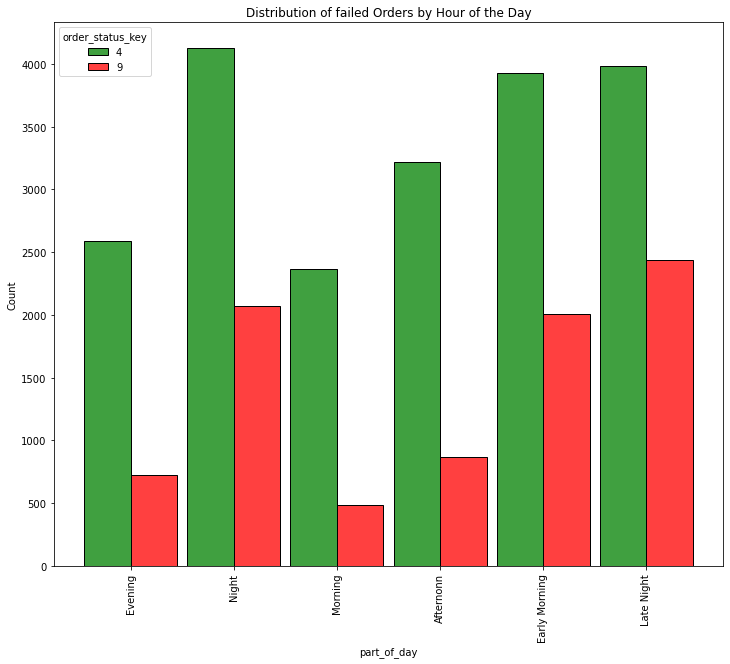

In [70]:
# Distribution plot by hour of the day
plt.figure(figsize=(12,10))
colors = ["green","red"]
sns.histplot(x="part_of_day",hue="order_status_key", data=df, stat="count", multiple="dodge",palette=colors,shrink=.9)
plt.xticks(rotation=90)
plt.title("Distribution of failed Orders by Hour of the Day")

1. According to the plot most of the rejections by clients are at night which is from 1900hrs to 2200hrs closely followed by late night which is between 2200hrs to 0400hrs.
2. Most rejections by the system also happen during late night followed by the night part of the day.
3. Least number of rejections by client and by the system happen during the morning hours (0800hrs to 1200hrs).
4. This could may be explained by the fact that at night people are impatient or in hurry to get home (maybe)